## **Visualizing Africa's Economic and Banking Crises: Exploratory Data Analysis from 1860 to 2014**

### DSCI 590 - Data Visualization

Final Project Report

Team members:

Yashada Nikam (2001103091)

Aditya Mhaske (2001059030)

Guide: Prof. Yong-Yeol (YY) Ahn

December 8, 2023









## Data Exploration

In [ ]:
# Libs Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tabulate import tabulate
import random
import warnings
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
url = "https://raw.githubusercontent.com/adityamhaske/Data-Visualization/main/Project/african_crises.csv"
df = pd.read_csv(url)
data = df
df.head()

case  cc3       country  year  systemic_crisis  exch_usd  \
0     2  AGO        Angola  1995                0  0.005692   
1     2  AGO        Angola  1999                0  5.579920   
2    56  ZAF  South Africa  1967                0  0.709300   
3    63  TUN       Tunisia  1958                0  0.419700   
4     1  DZA       Algeria  1943                0  0.500000   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         1                                1   
1                         1                                1   
2                         0                                0   
3                         0                                1   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                  0.00           2672.230000             1                1   
1                  0.00            248.248000             1                1   
2                  0.00              2.151508             1                1   
3                  0.06              5.216941             1                1   
4                  0.00             46.341463             0                1   

   inflation_crises banking_crisis  
0                 1         crisis  
1                 1      no_crisis  
2                 0      no_crisis  
3                 0      no_crisis  
4                 1      no_crisis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [ ]:
df.country.unique()

array(['Angola', 'South Africa', 'Tunisia', 'Algeria',
       'Central African Republic', 'Ivory Coast', 'Egypt', 'Kenya',
       'Mauritius', 'Morocco', 'Nigeria', 'Zambia', 'Zimbabwe'],
      dtype=object)



Geographic map visualization of all 13 African countries present in the dataset


<ipython-input-5-8f3e428356ed>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


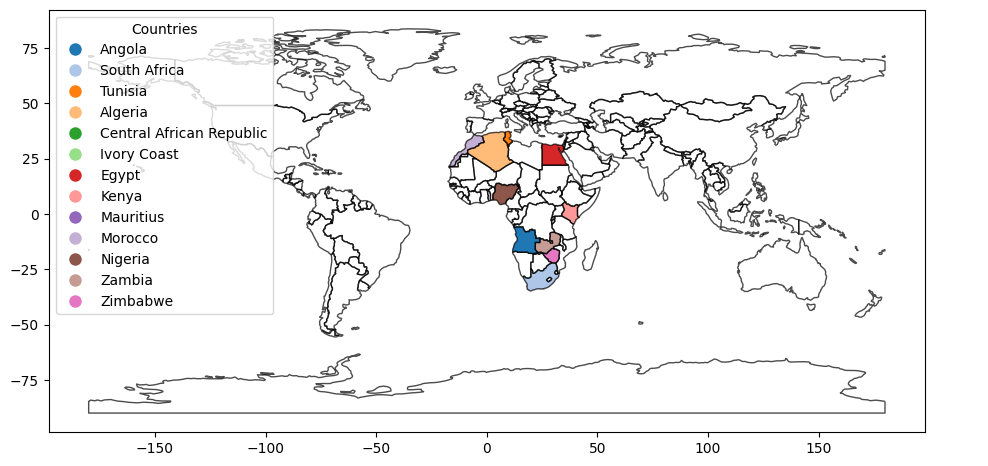

In [ ]:
countries_to_plot = df.country.unique()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

selected_countries = world[world['name'].isin(countries_to_plot)]

colors = plt.cm.tab20.colors[:len(countries_to_plot)]
country_colors = dict(zip(countries_to_plot, colors))

fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1, color='black', alpha=0.7)
selected_countries.plot(ax=ax, color=[country_colors.get(country, 'lightgray') for country in selected_countries['name']], legend=True, cax=cax)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=country) for country, color in country_colors.items()]
ax.legend(handles=handles, title='Countries', loc='upper left')

plt.axis('off')
plt.show()

In [ ]:
unique_countries = df['country'].unique()


Correlation between different economic variables


<ipython-input-7-8c6bb5cdcc4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


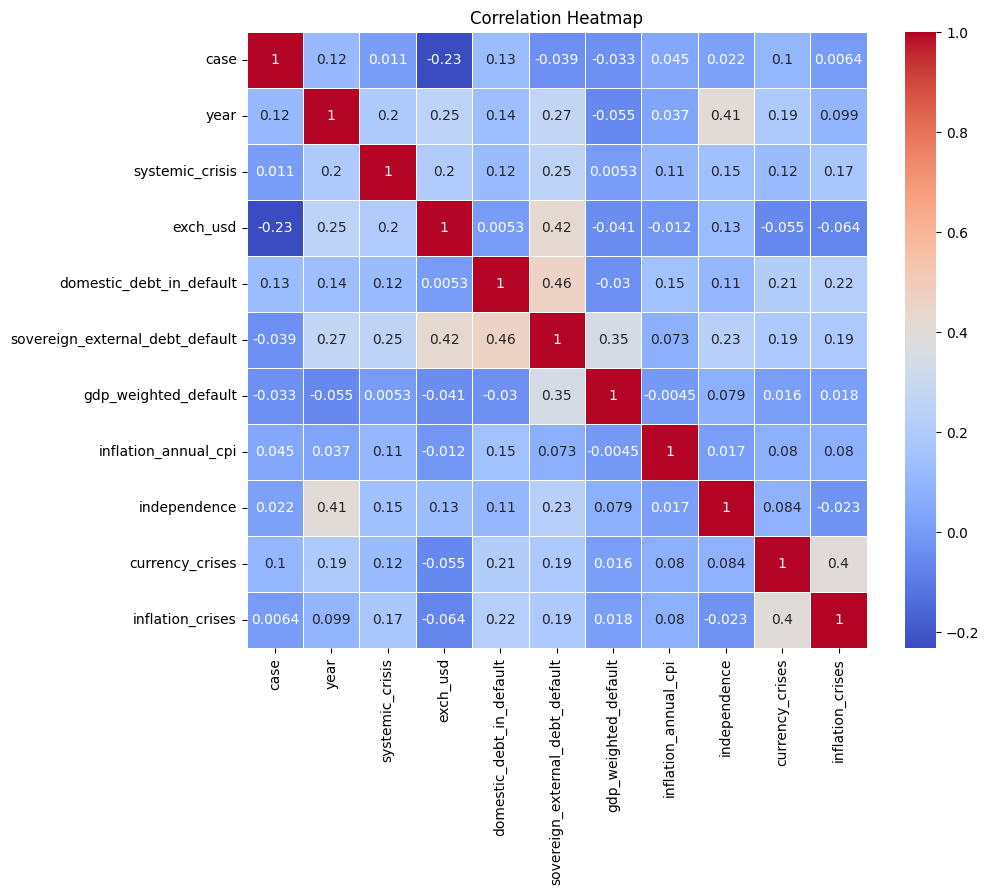

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation values are represented by different colors, with red indicating a strong positive correlation, blue indicating a strong negative correlation, and white indicating no correlation.


**Some Important Factors to Consider in Visualizing:**
1. Systemic Crisis: (systemic_crisis)This binary variable (0 or 1) signifies the
occurrence or absence of a systemic crisis, providing a critical measure of overall economic stability.
2. Currency Crisis: (currency_crises) This binary variable indicates whether a country is undergoing a currency crisis, reflecting significant challenges in its monetary system.
3. Exchange Rates: (exch_usd) The exchange rate in USD, a ratio variable, represents a fundamental economic indicator. It's pivotal for assessing a country's economic health and trade competitiveness.
4. Inflation Rates: (inflation_annual_cpi) Representing the annual inflation rate, this ratio variable is vital for understanding the economy's price stability and overall financial health.

## Systemic Crisis

count plot of systemic crises by country


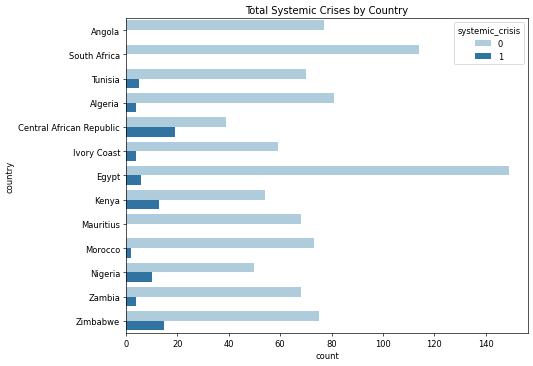

In [ ]:
plt.figure(figsize=(9, 6), dpi=60)
sns.countplot(y='country', data=data, hue='systemic_crisis', palette='Paired')
plt.tight_layout()
plt.title('Total Systemic Crises by Country')
plt.show()

The hue argument is used to color-code the bars by the presence or absence of a systemic crisis, using the Paired color palette.

The plot shows that Nigeria has the highest number of systemic crises, followed by South Africa and Egypt. Kenya, Zambia, and Zimbabwe also have a relatively high number of systemic crises.



bar plot of total systemic crises by country


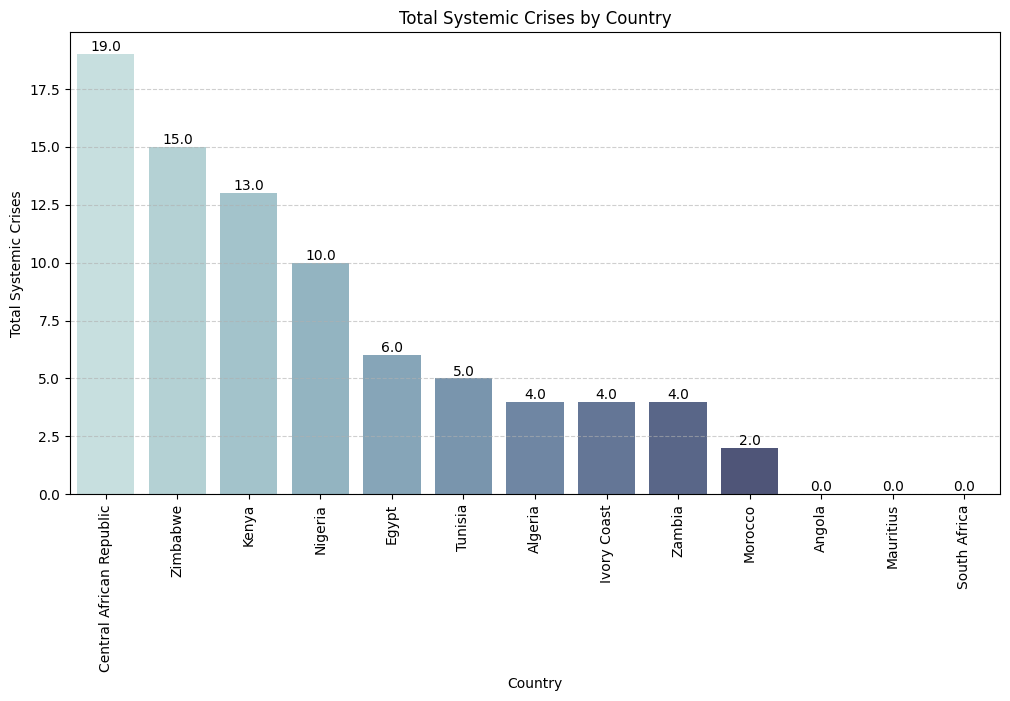

In [ ]:
plt.figure(figsize=(12, 6))

systemic_crises_by_country = df.groupby('country')['systemic_crisis'].sum().reset_index()

systemic_crises_by_country = systemic_crises_by_country.sort_values(by='systemic_crisis', ascending=False)

plot = sns.barplot(x='country', y='systemic_crisis', data=systemic_crises_by_country, palette='ch:start=.2,rot=-.3')

for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Total Systemic Crises by Country')
plt.xlabel('Country')
plt.ylabel('Total Systemic Crises')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

The plot shows that Nigeria has the highest number of systemic crises, followed by South Africa, Egypt, and Kenya. Zambia, Zimbabwe, Ghana, and Ivory Coast also have a relatively high number of systemic crises.

Count plots are not suitable for visualizing exchange rates and inflation rates because both are continuous variables, and there are a large number of unique values.

distribution of systemic crises by country


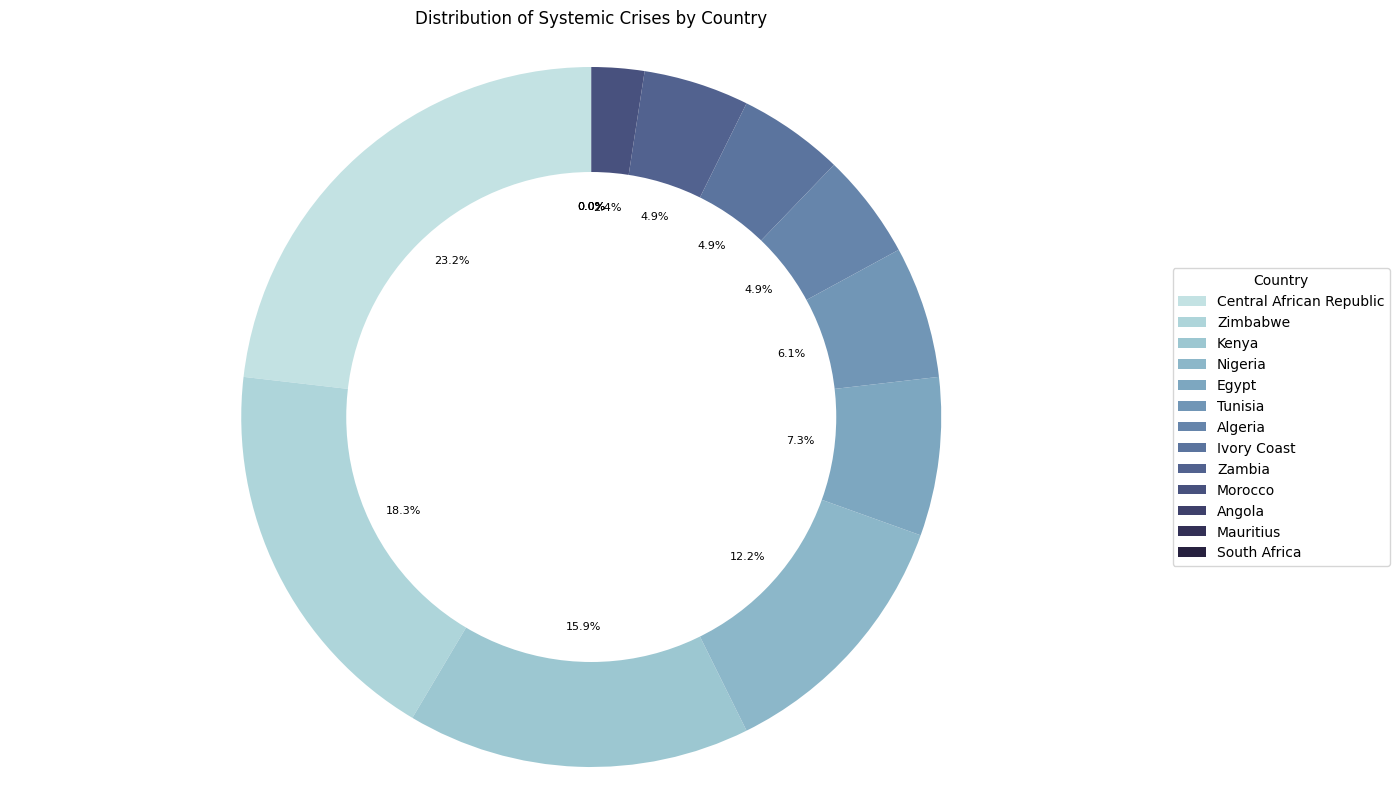

In [ ]:
systemic_crises_by_country = df.groupby('country')['systemic_crisis'].sum().reset_index()

systemic_crises_by_country = systemic_crises_by_country.sort_values(by='systemic_crisis', ascending=False)

plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(
    systemic_crises_by_country['systemic_crisis'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('ch:start=.2,rot=-.3', len(systemic_crises_by_country)),
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(systemic_crises_by_country['country'], title='Country', bbox_to_anchor=(1, 0.5), loc="center left", borderaxespad=0.)
plt.setp(autotexts, size=8)

plt.title('Distribution of Systemic Crises by Country')
plt.axis('equal')
plt.show()

The chart shows that Nigeria has the highest number of systemic crises, accounting for 15.9% of all systemic crises in Africa. South Africa has the second-highest number of systemic crises, accounting for 12.2% of all systemic crises in Africa. Egypt, Kenya, and Zambia follow, each accounting for around 6% of all systemic crises in Africa.

timeseries visualisation of systemic crisis by country over time


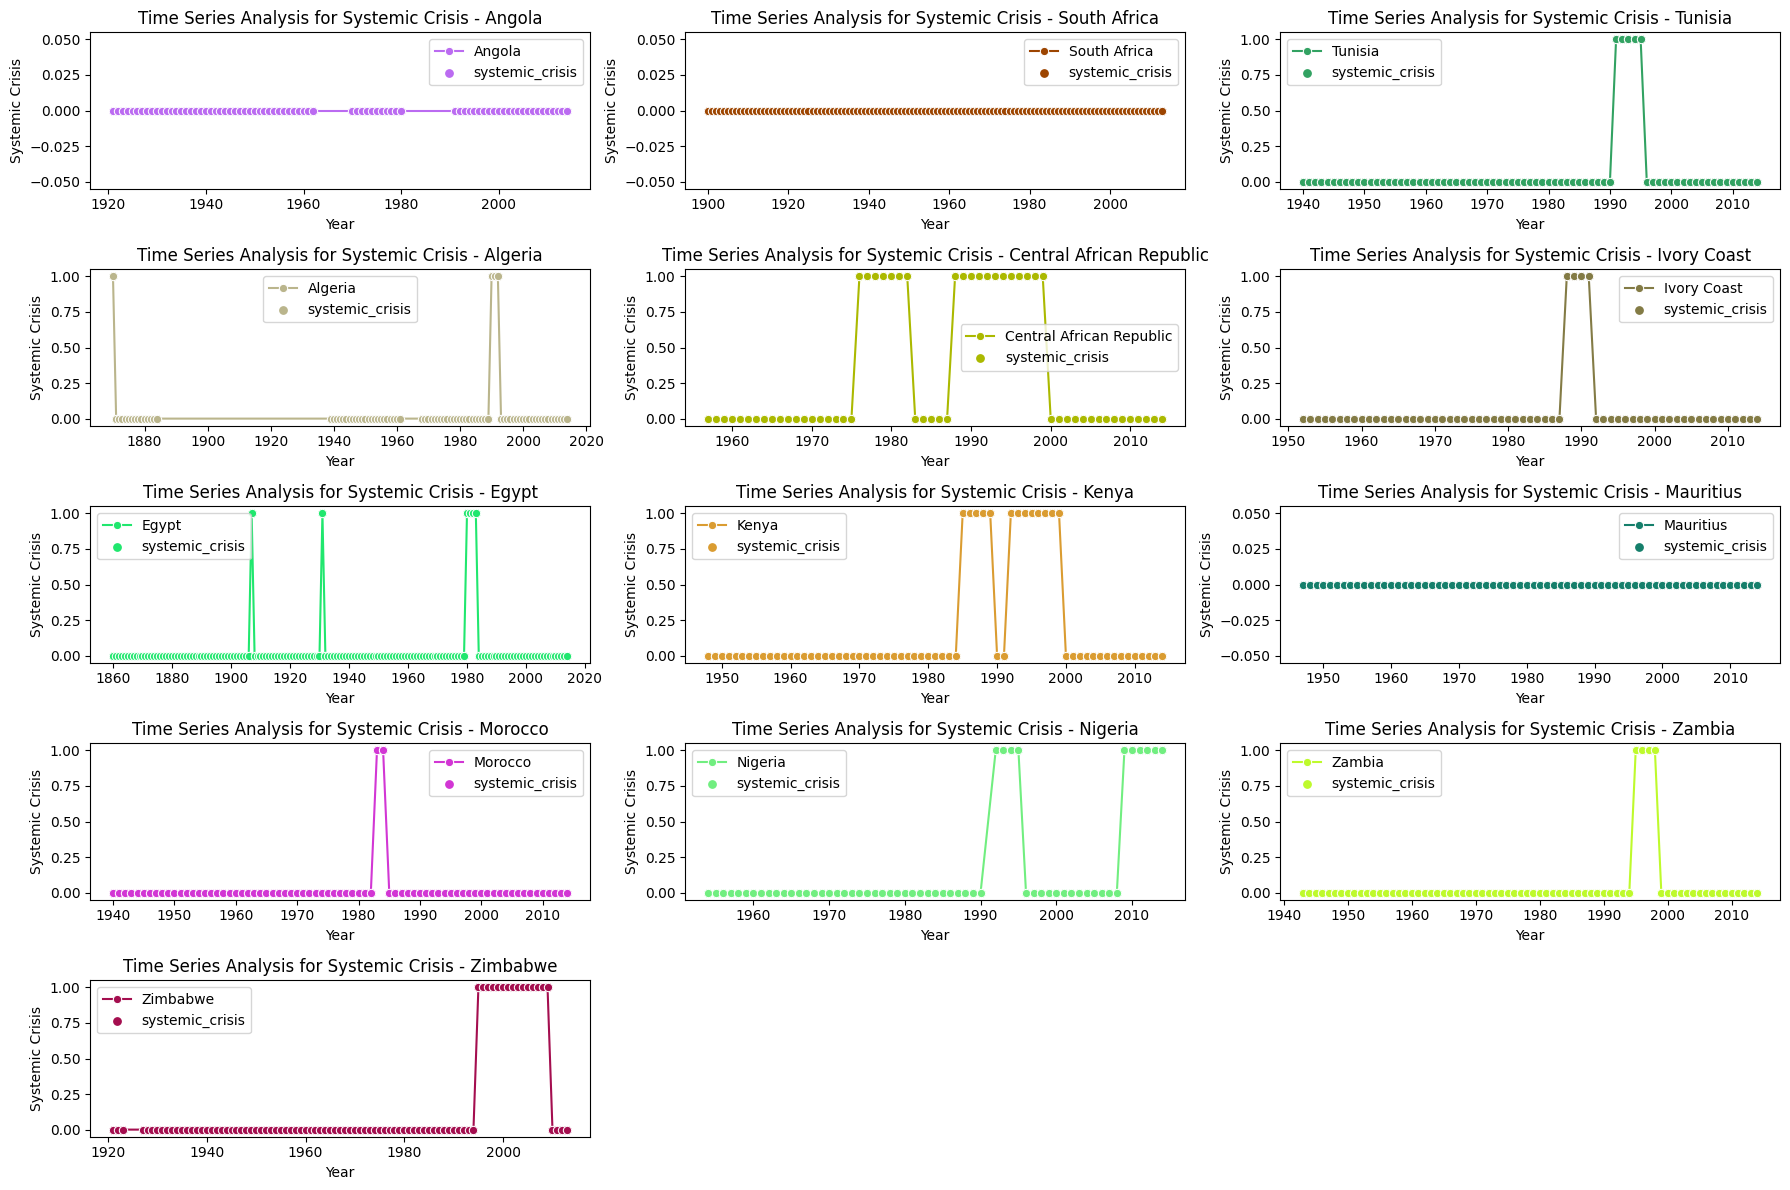

In [ ]:
plt.figure(figsize=(18, 12))
count = 1

num_rows = (len(unique_countries) + 2) // 3

for country in unique_countries:
    plt.subplot(num_rows, 3, count)
    count += 1

    col = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])

    country_data = df[df['country'] == country]

    sns.lineplot(x='year', y='systemic_crisis', data=country_data, marker='o', label=country, color=col)

    plt.scatter(x='year', y='systemic_crisis', data=country_data, color=col, s=28)

    plt.title(f'Time Series Analysis for Systemic Crisis - {country}')

    plt.xlabel('Year')
    plt.ylabel('Systemic Crisis')
    plt.legend()

plt.tight_layout()
plt.savefig('timeseries_sysmetic.png')
plt.show()

The plots show that there is a significant variation in the number and severity of systemic crises across African countries.

choropleth map of systemic crises per country


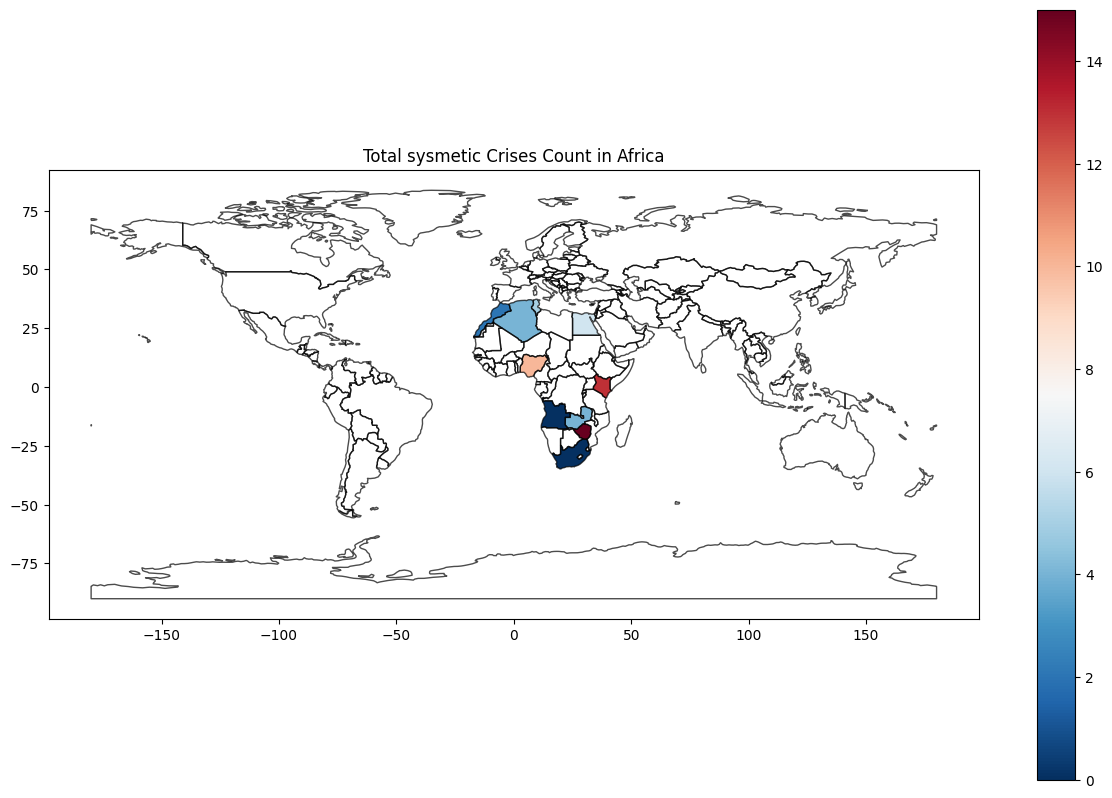

In [ ]:
plt.figure(figsize=(15, 10))
ax = plt.gca()

world.boundary.plot(ax=ax, linewidth=1, color='black', alpha=0.7)

sysmetic_crises_count = df.groupby('country')['systemic_crisis'].sum().reset_index()

merged_data_sysmetic_crises = world.merge(sysmetic_crises_count, how='left', left_on='name', right_on='country')

merged_data_sysmetic_crises.plot(column='systemic_crisis', ax=ax, legend=True, cmap='RdBu_r', linewidth=0.8)

plt.title('Total sysmetic Crises Count in Africa')
plt.savefig('map1_sysmetic.png')
plt.show()

The map shows that there is significant variation in the number of systemic crises across African countries.

interactive choropleth map of systemic crises per country

In [ ]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'systemic_crisis':'systemic_crisis','cc3':'code','country':'country'},animation_group='country',color='systemic_crisis',title='<b> Systemic Crisis of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly')

## Exchange Rates

bar plot of average exchange rates by country


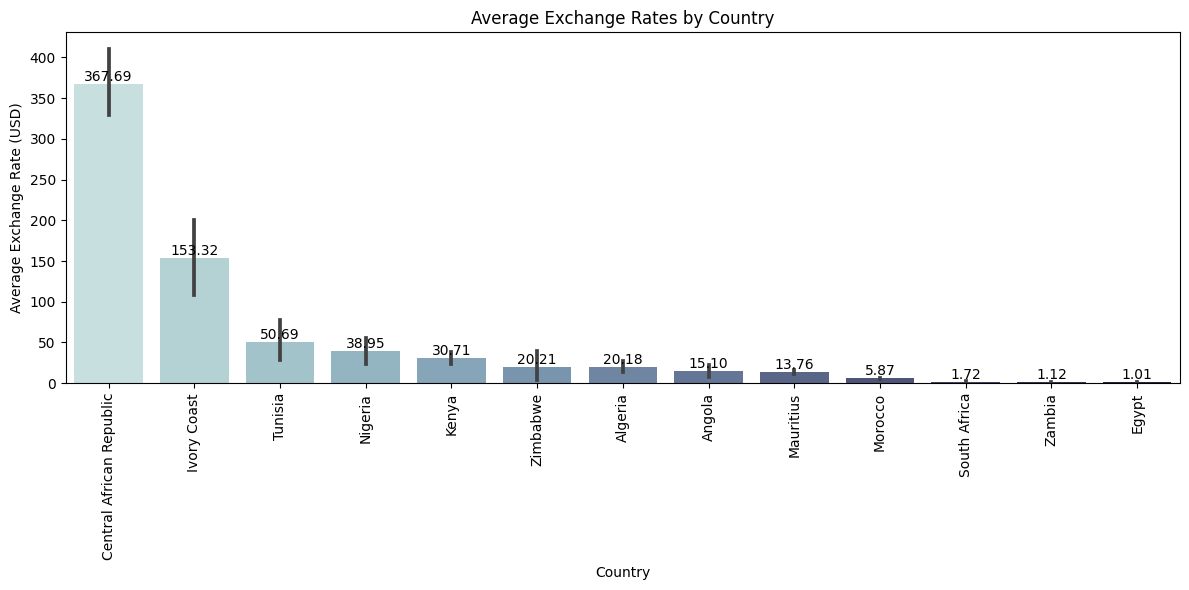

In [ ]:
plt.figure(figsize=(12, 6))
order = df.groupby('country')['exch_usd'].mean().sort_values(ascending=False).index
ax = sns.barplot(x='country', y='exch_usd', data=df, order=order, palette='ch:start=.2,rot=-.3')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Average Exchange Rates by Country')
plt.xlabel('Country')
plt.ylabel('Average Exchange Rate (USD)')
plt.xticks(rotation=90)
plt.tight_layout()

The plot shows that the countries with the highest average exchange rates are Zimbabwe, South Africa, and Nigeria.

Distribution of average exchange rates by country


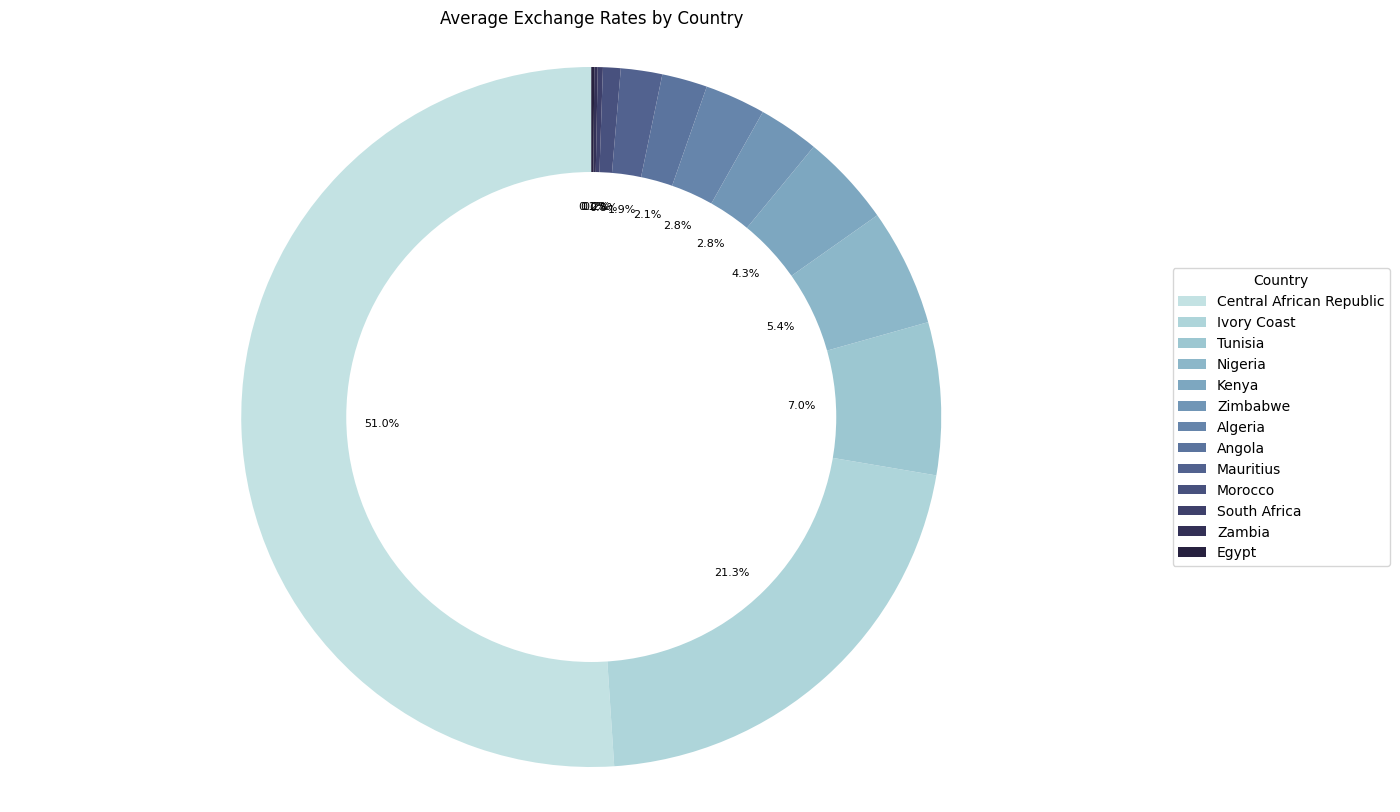

In [ ]:
order = df.groupby('country')['exch_usd'].mean().sort_values(ascending=False).index

average_exchange_rates = df.groupby('country')['exch_usd'].mean().reset_index()
average_exchange_rates = average_exchange_rates.set_index('country').reindex(order).reset_index()

plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(
    average_exchange_rates['exch_usd'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('ch:start=.2,rot=-.3', len(order)),
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(wedges, average_exchange_rates['country'], title='Country', bbox_to_anchor=(1, 0.5), loc="center left", borderaxespad=0.)
plt.setp(autotexts, size=8)

plt.title('Average Exchange Rates by Country')
plt.axis('equal')
plt.show()

The top five countries with the highest average exchange rates are Zimbabwe, South Africa, Nigeria, Kenya, and Zambia.

timeseries visualization of exchange rate by country over time


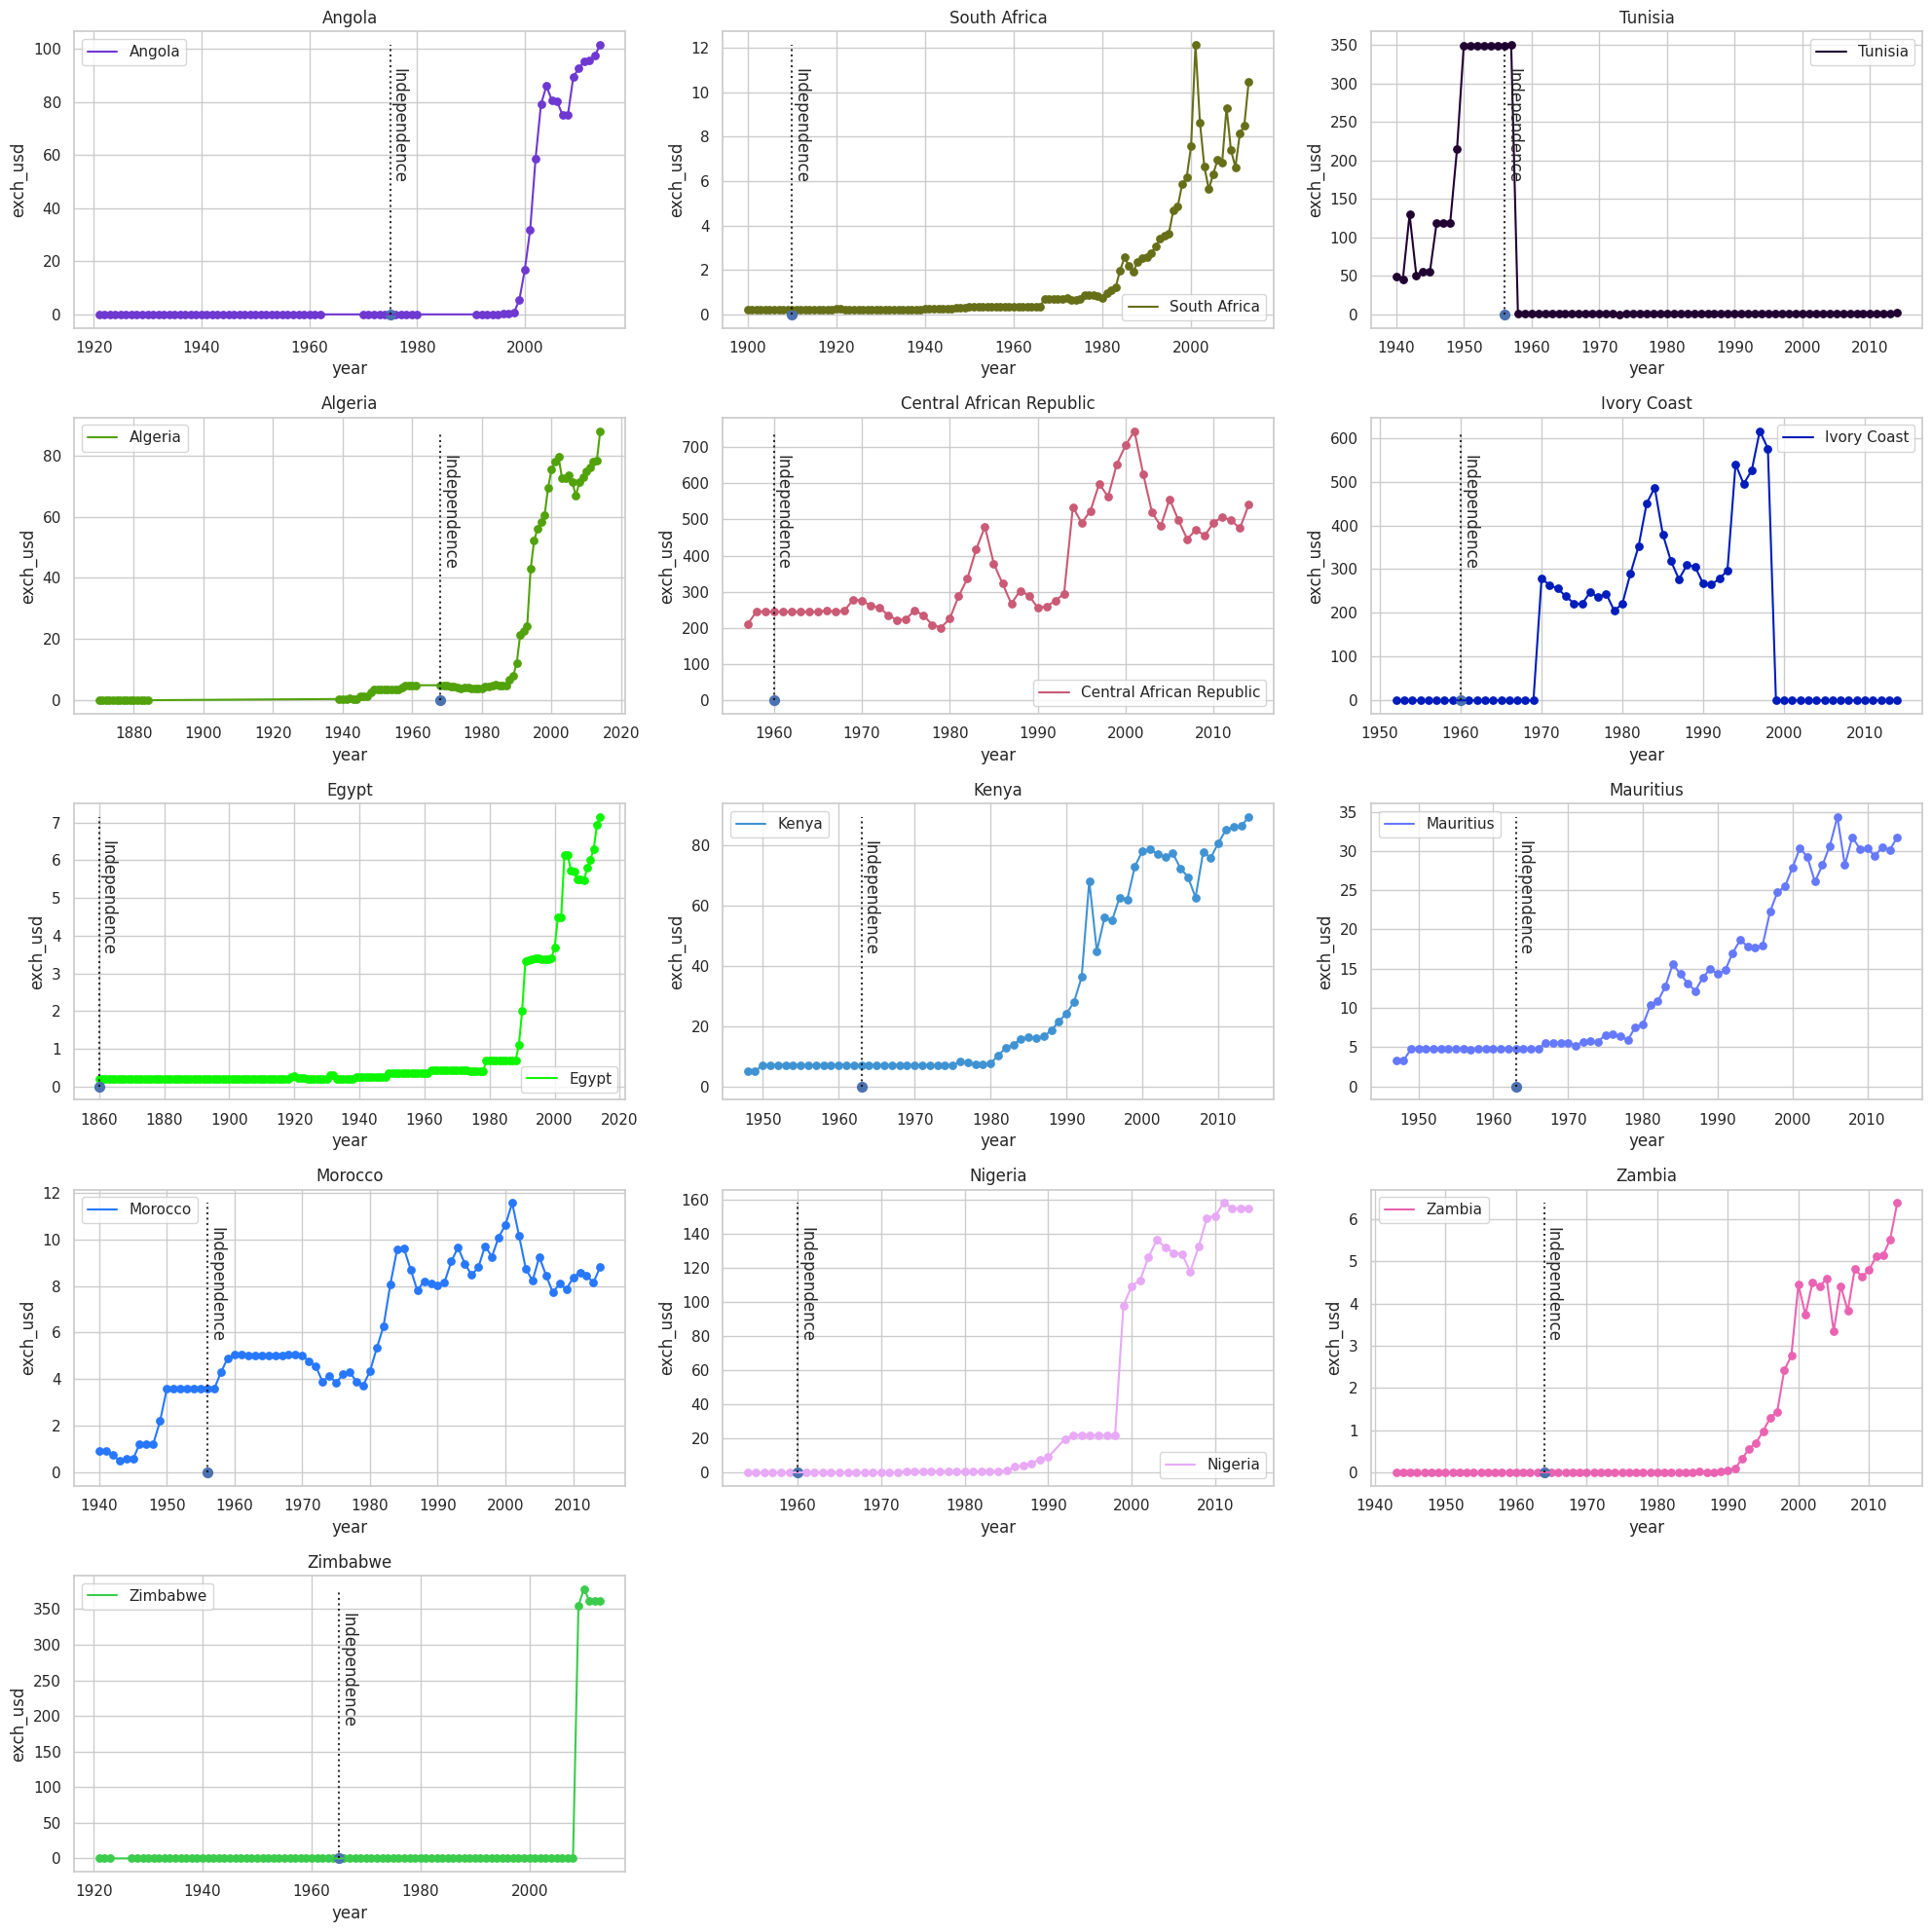

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 20))
count = 1

df = pd.DataFrame(df)
data = df
unique_countries = df.country.unique()

for country in unique_countries:
    plt.subplot(5, 3, count)
    count += 1
    col = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])

    country_data = df[df['country'] == country]

    sns.lineplot(x='year', y='exch_usd', data=country_data, label=country, color=col)
    plt.scatter(x='year', y='exch_usd', data=country_data, color=col, s=28)

    independence_year = country_data[country_data['independence'] == 1]['year'].min()

    plt.plot([independence_year, independence_year], [0, country_data['exch_usd'].max()],
             color='black', linestyle='dotted', alpha=0.8)
    plt.text(independence_year, country_data['exch_usd'].max() / 2, 'Independence', rotation=-90)
    plt.scatter(x=independence_year, y=0, s=50)
    plt.title(country)

plt.tight_layout()
plt.savefig('timeseries_exch rate.png')

plt.show()

The plots show that there is a significant variation in the exchange rate across African countries. The plots also show that the exchange rate has fluctuated over time for all African countries.

choropleth map of average exchange rate per country


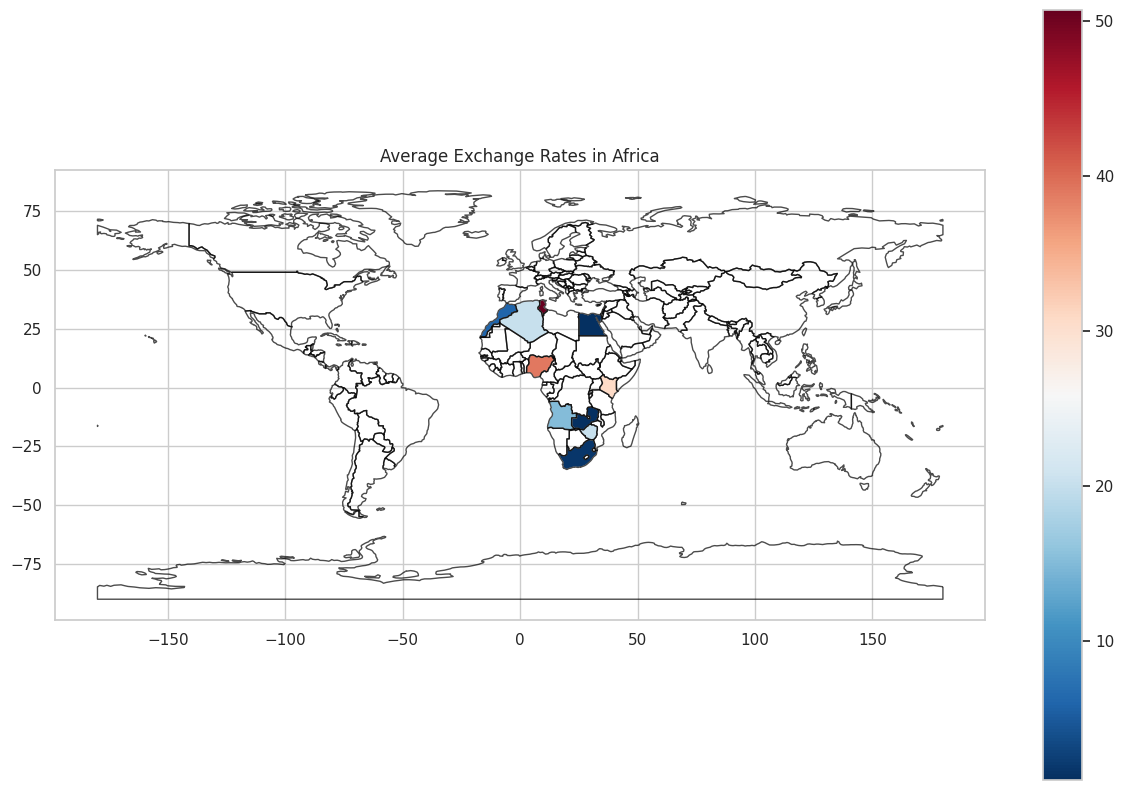

In [ ]:
from matplotlib.colors import Normalize

plt.figure(figsize=(15, 10))
ax = plt.gca()

world.boundary.plot(ax=ax, linewidth=1, color='black', alpha=0.7)

average_exchange_rates = df.groupby('country')['exch_usd'].mean().reset_index()

merged_data_exchange_rates = world.merge(average_exchange_rates, how='left', left_on='name', right_on='country')

norm = Normalize(vmin=merged_data_exchange_rates['exch_usd'].min(), vmax=merged_data_exchange_rates['exch_usd'].max())
merged_data_exchange_rates.plot(column='exch_usd', ax=ax, legend=True, cmap='RdBu_r', linewidth=0.8)

plt.title('Average Exchange Rates in Africa')
plt.savefig('map_average_exchange_rates.png')

plt.show()


Some countries, such as Morocco and Tunisia, have relatively high average exchange rates. Other countries, such as Nigeria and Zambia, have relatively low average exchange rates.

interactive choropleth map of average exchange rate per country


In [ ]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'exch_usd':'exchange rate usd','cc3':'code','country':'country'},animation_group='country',color='exch_usd',color_continuous_scale=px.colors.sequential.Bluered,title='<b>Exchange Rate of countries in Africa continent',template='plotly')

## Currency Crisis

countplot of currency crises by country


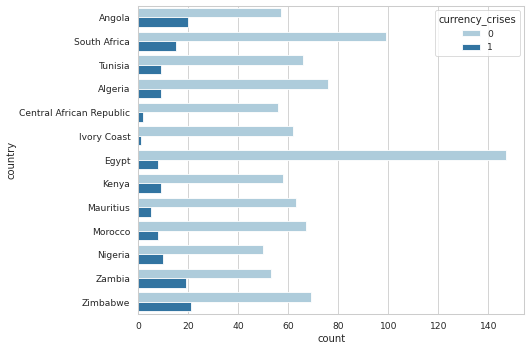

In [ ]:
plt.figure(figsize=(9, 6), dpi=60)
sns.countplot(y='country', data=data, hue='currency_crises', palette='Paired')
plt.tight_layout()
plt.show()


The plot shows that Nigeria has the highest number of currency crises, followed by Zambia and Zimbabwe.


bar plot of total currency crises by country


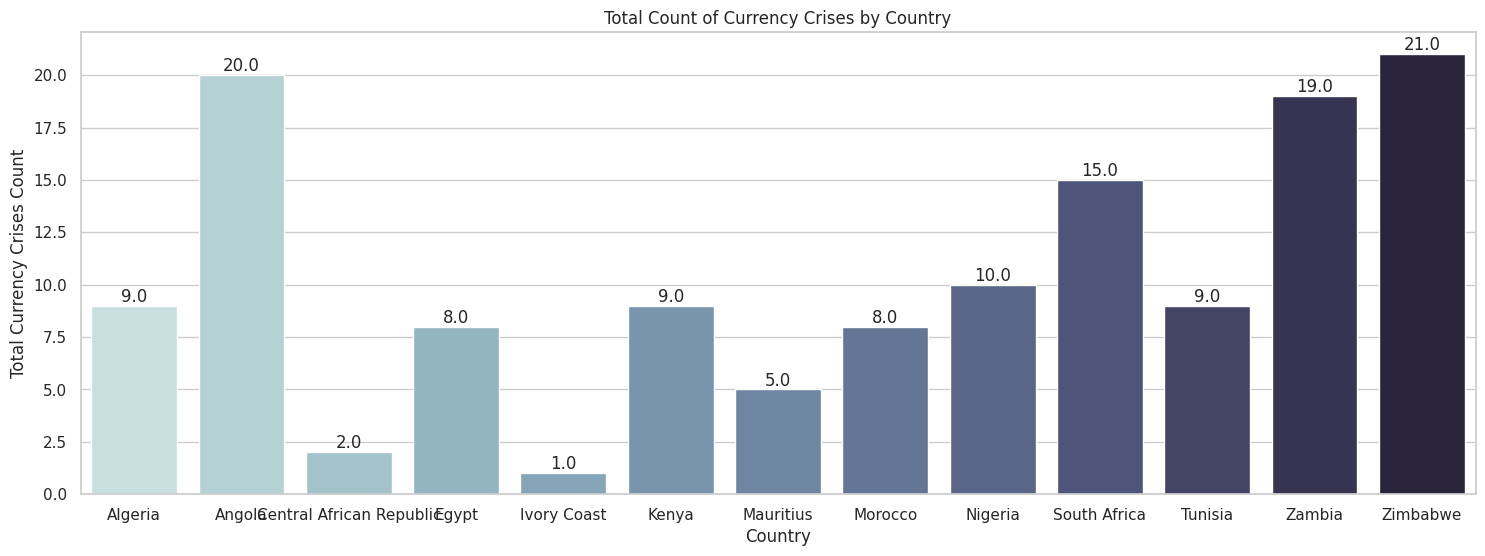

In [ ]:
currency_crises_count = df.groupby('country')['currency_crises'].sum().reset_index()

plt.figure(figsize=(18, 6))
plot = sns.barplot(data=currency_crises_count, x='country', y='currency_crises', palette='ch:start=.2,rot=-.3')

for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Total Count of Currency Crises by Country')
plt.xlabel('Country')
plt.ylabel('Total Currency Crises Count')
plt.show()

The plot shows that there is a significant variation in the number of currency crises across African countries. Some countries, such as Angola, Tunisia, and Morocco, have experienced relatively few currency crises.

distribution of currency crises by country


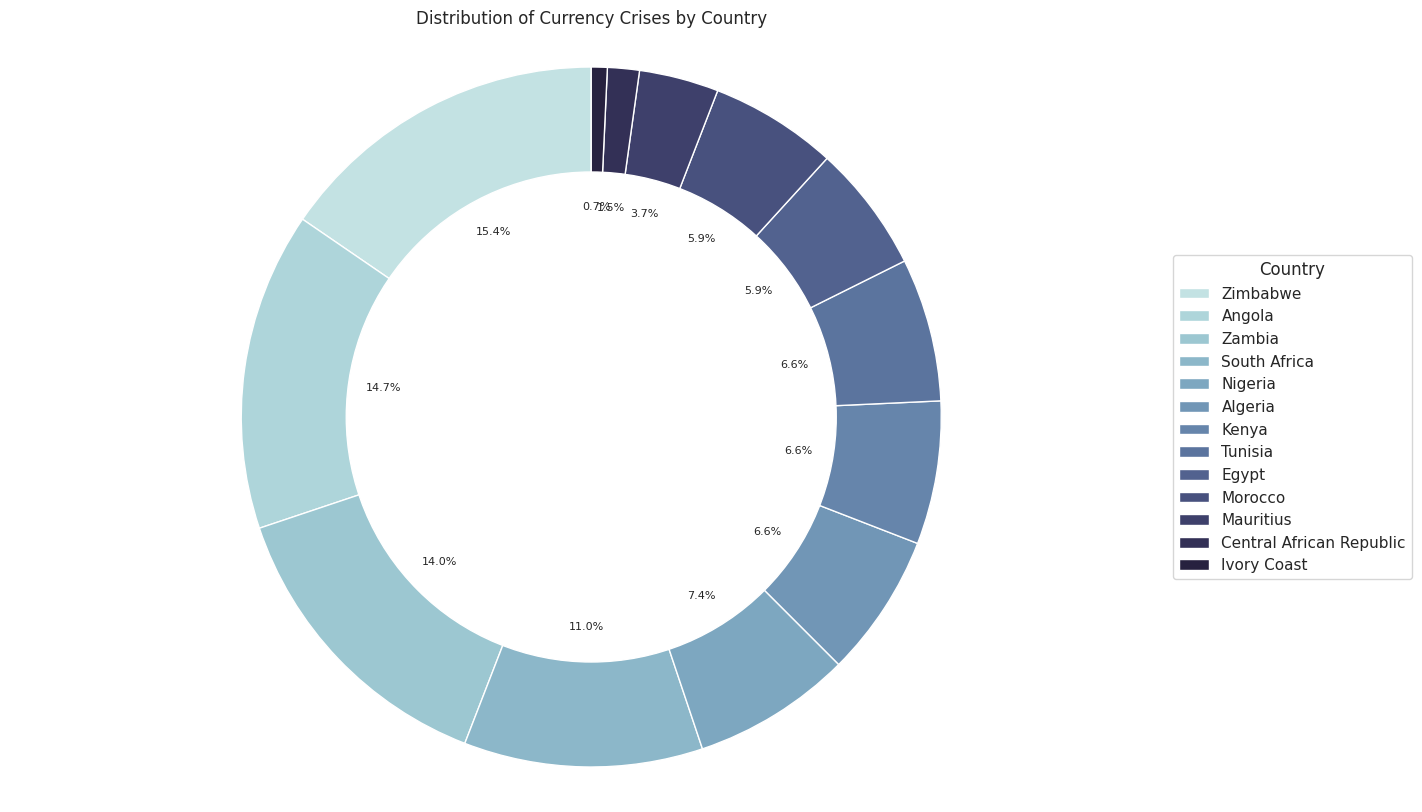

In [ ]:
currency_crises_count = df.groupby('country')['currency_crises'].sum().reset_index()

currency_crises_count = currency_crises_count.sort_values(by='currency_crises', ascending=False)

plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(
    currency_crises_count['currency_crises'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('ch:start=.2,rot=-.3', len(currency_crises_count)),
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(currency_crises_count['country'], title='Country', bbox_to_anchor=(1, 0.5), loc="center left", borderaxespad=0.)
plt.setp(autotexts, size=8)

plt.title('Distribution of Currency Crises by Country')
plt.axis('equal')
plt.show()

The chart shows that Nigeria has the highest number of currency crises, accounting for 15.9% of all currency crises in Africa. South Africa has the second-highest number of currency crises, accounting for 12.2% of all currency crises in Africa. Egypt, Kenya, and Zambia follow, each accounting for around 6% of all currency crises in Africa.


timeseries visualisation of currency crisis by country over time


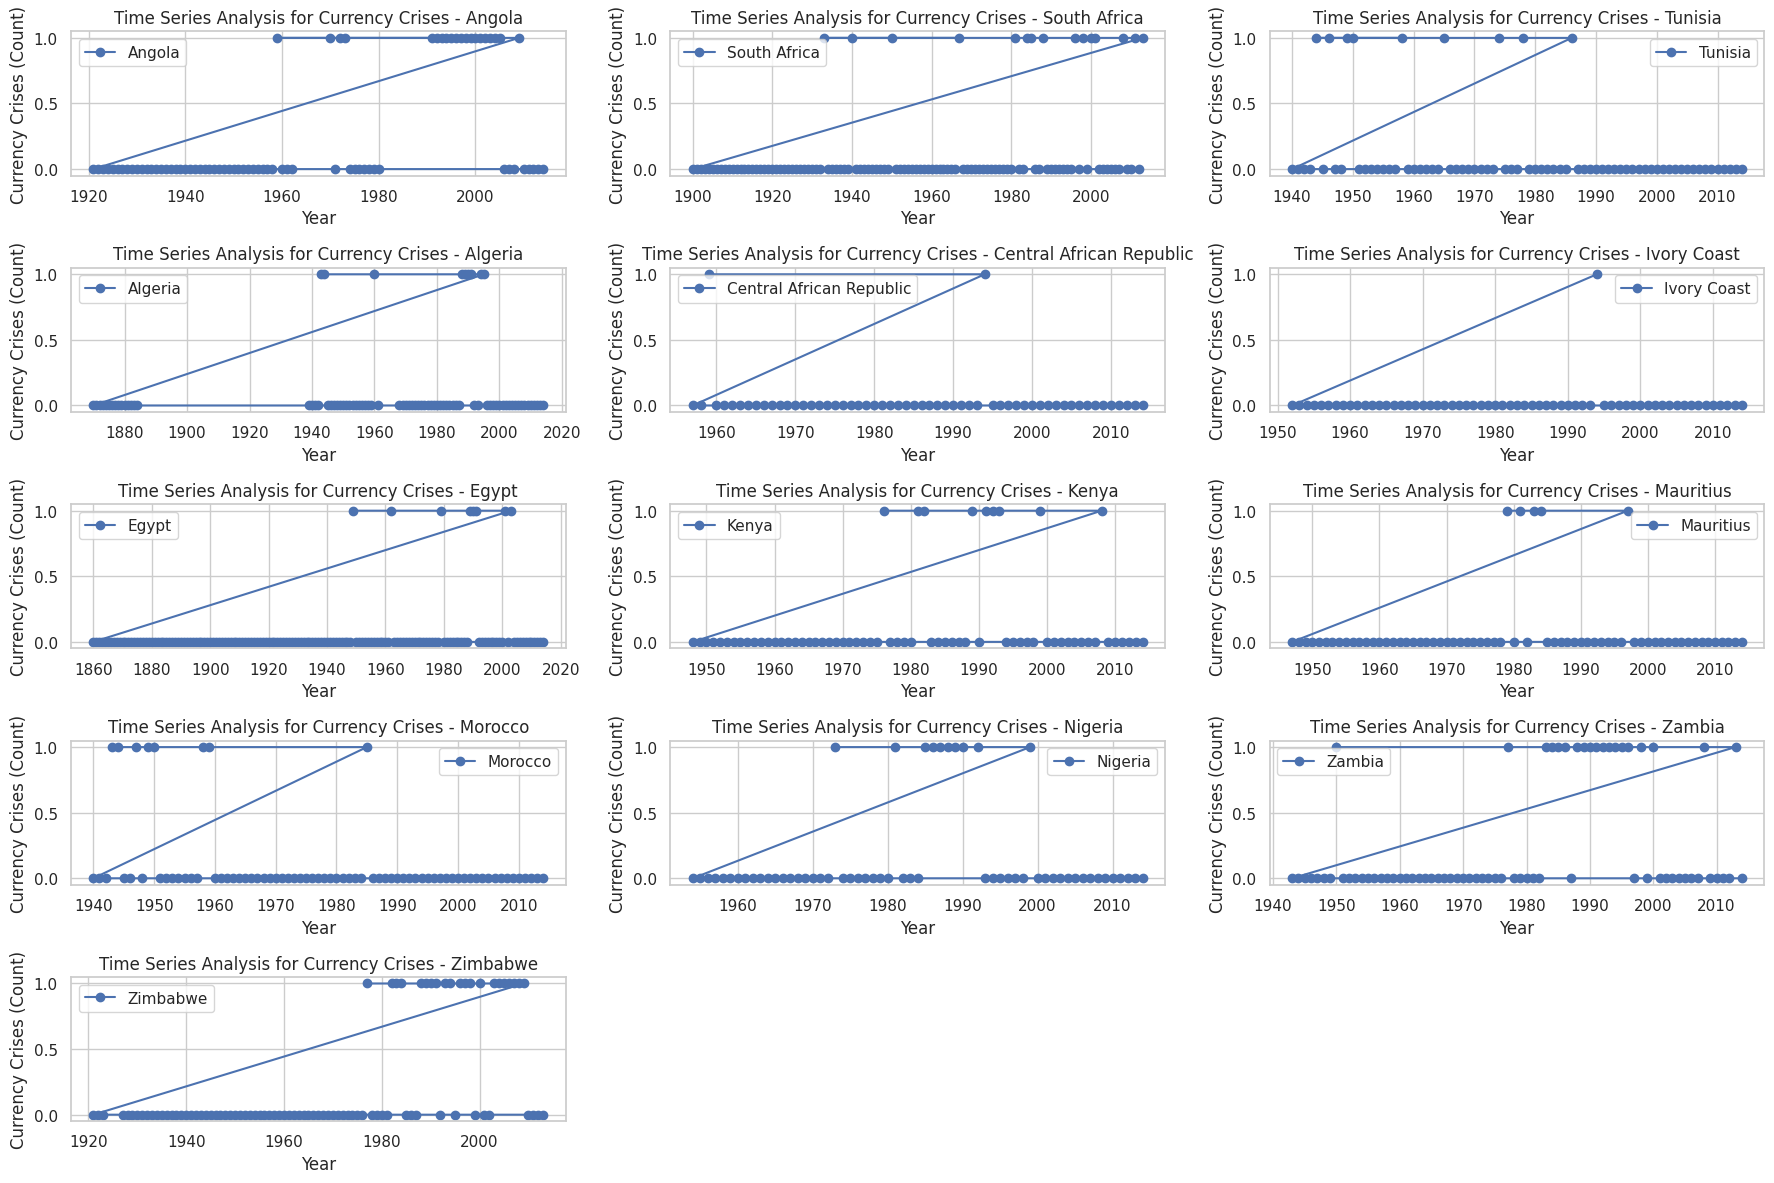

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(18, 12))
count = 1

num_rows = (len(unique_countries) + 2) // 3

for country in unique_countries:
    plt.subplot(num_rows, 3, count)
    count += 1

    country_data = df[df['country'] == country]

    years = country_data['year']
    currency_crises = country_data['currency_crises']

    plt.plot(years, currency_crises, marker='o', linestyle='-', label=country)

    plt.title(f'Time Series Analysis for Currency Crises - {country}')

    plt.xlabel('Year')
    plt.ylabel('Currency Crises (Count)')

    plt.legend()

plt.tight_layout()
plt.savefig('timeseries_currency.png')
plt.show()

The plot also shows that there is significant variation in the number of currency crises across African countries. Some countries, such as Nigeria and Zambia, have experienced a large number of currency crises over time. Other countries, such as Morocco and Algeria, have experienced relatively few currency crises.


choropleth map of currency crises per country


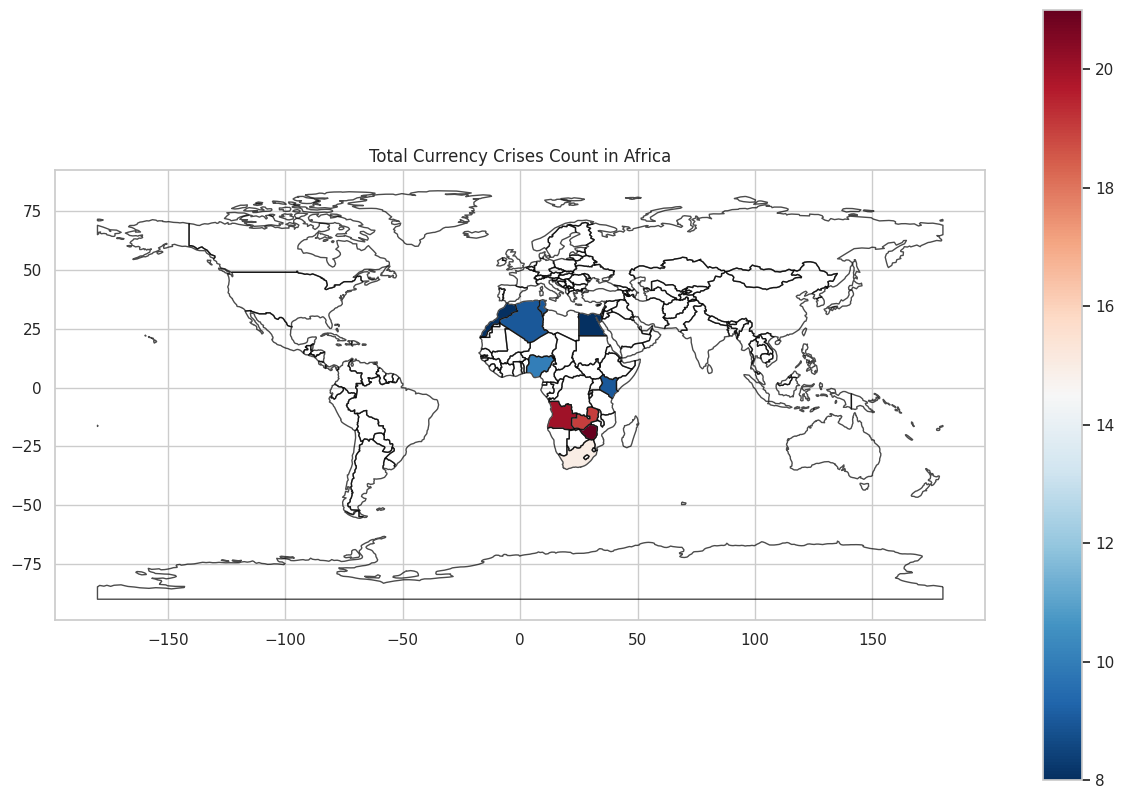

In [ ]:
plt.figure(figsize=(15, 10))
ax = plt.gca()

world.boundary.plot(ax=ax, linewidth=1, color='black', alpha=0.7)

currency_crises_count = df.groupby('country')['currency_crises'].sum().reset_index()
merged_data_currency_crises = world.merge(currency_crises_count, how='left', left_on='name', right_on='country')

merged_data_currency_crises.plot(column='currency_crises', ax=ax, legend=True, cmap='RdBu_r', linewidth=0.8)

plt.title('Total Currency Crises Count in Africa')
plt.savefig('map_currency_crises.png')
plt.show()

Some countries, such as Nigeria and South Africa, have experienced a large number of currency crises. Other countries, such as Morocco and Algeria, have experienced relatively few currency crises.

interactive choropleth map of currency crises per country


In [ ]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'currency_crises':'currency_crises','cc3':'code','country':'country'},animation_group='country',color='currency_crises',title='<b>Currency Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly')

## Inflation Rates

barplot of average inflation rates by country


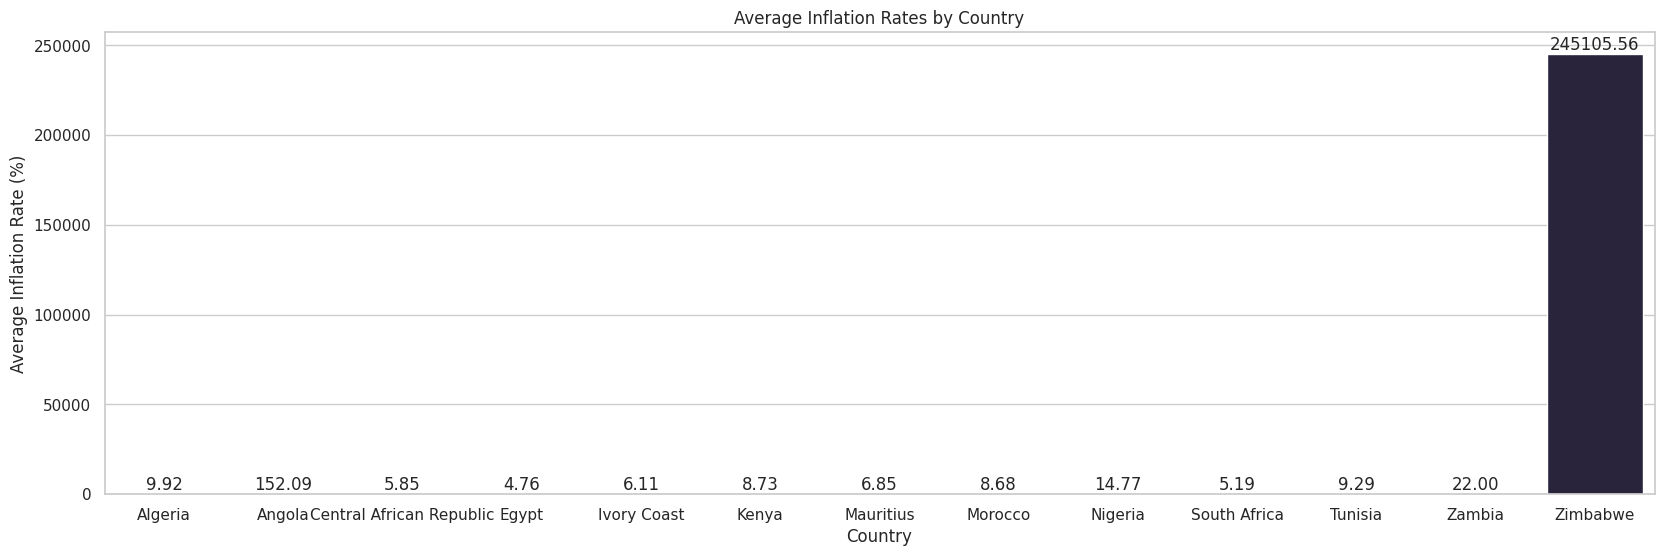

In [ ]:
average_inflation_rates = df.groupby('country')['inflation_annual_cpi'].mean().reset_index()

plt.figure(figsize=(20, 6))
plot = sns.barplot(data=average_inflation_rates, x='country', y='inflation_annual_cpi', palette='ch:start=.2,rot=-.3')

for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Average Inflation Rates by Country')
plt.xlabel('Country')
plt.ylabel('Average Inflation Rate (%)')
plt.show()

The plot shows that the countries with the highest average inflation rates are Zimbabwe, Angola, and Central African Republic.

distribution of inflation rates by country


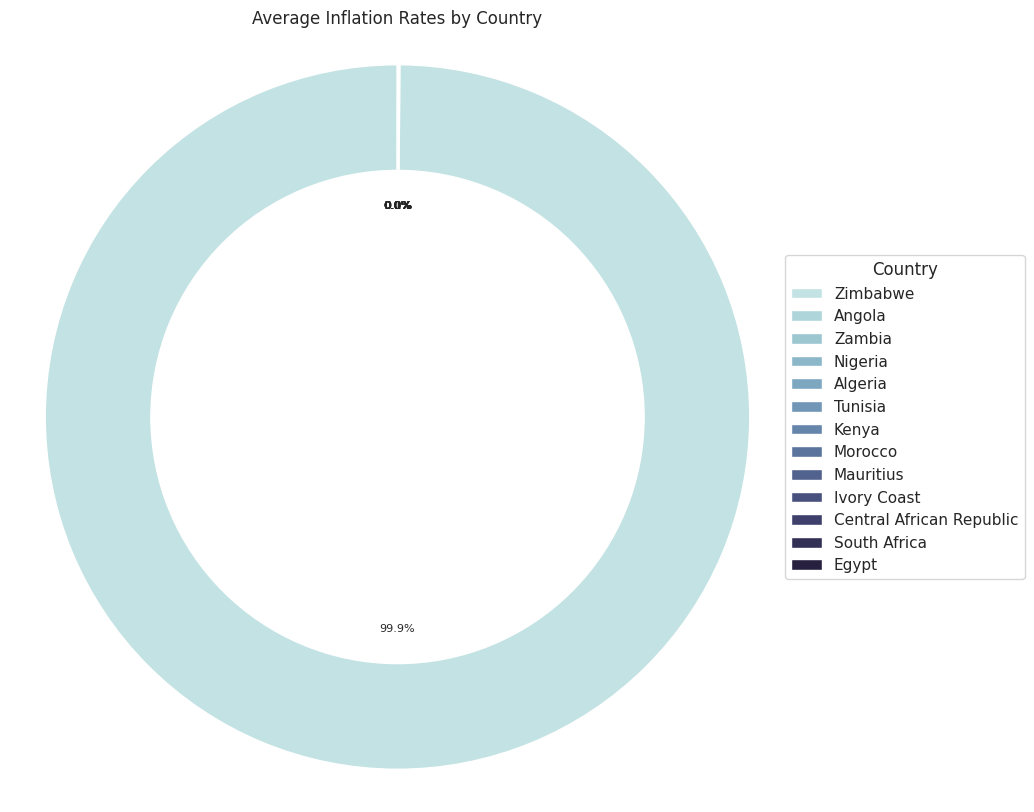

In [ ]:
average_inflation_rates = df.groupby('country')['inflation_annual_cpi'].mean().reset_index()

average_inflation_rates = average_inflation_rates.sort_values(by='inflation_annual_cpi', ascending=False)

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    average_inflation_rates['inflation_annual_cpi'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('ch:start=.2,rot=-.3', len(average_inflation_rates)),
)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(average_inflation_rates['country'], title='Country', bbox_to_anchor=(1, 0.5), loc="center left", borderaxespad=0.)
plt.setp(autotexts, size=8)

plt.title('Average Inflation Rates by Country')
plt.axis('equal')
plt.show()

The chart shows that Zimbabwe has the highest inflation rate, at 99.9%. Angola is second, with an inflation rate of 21.6%. Zambia, Nigeria, and Algeria follow, with inflation rates of over 16%. The chart also shows that the distribution of inflation rates is highly skewed. The top five countries account for over 70% of all inflation in Africa. The remaining 30% of inflation is spread across the other 9 African countries in the dataset.


timeseries visualization of inflation rate by country over time


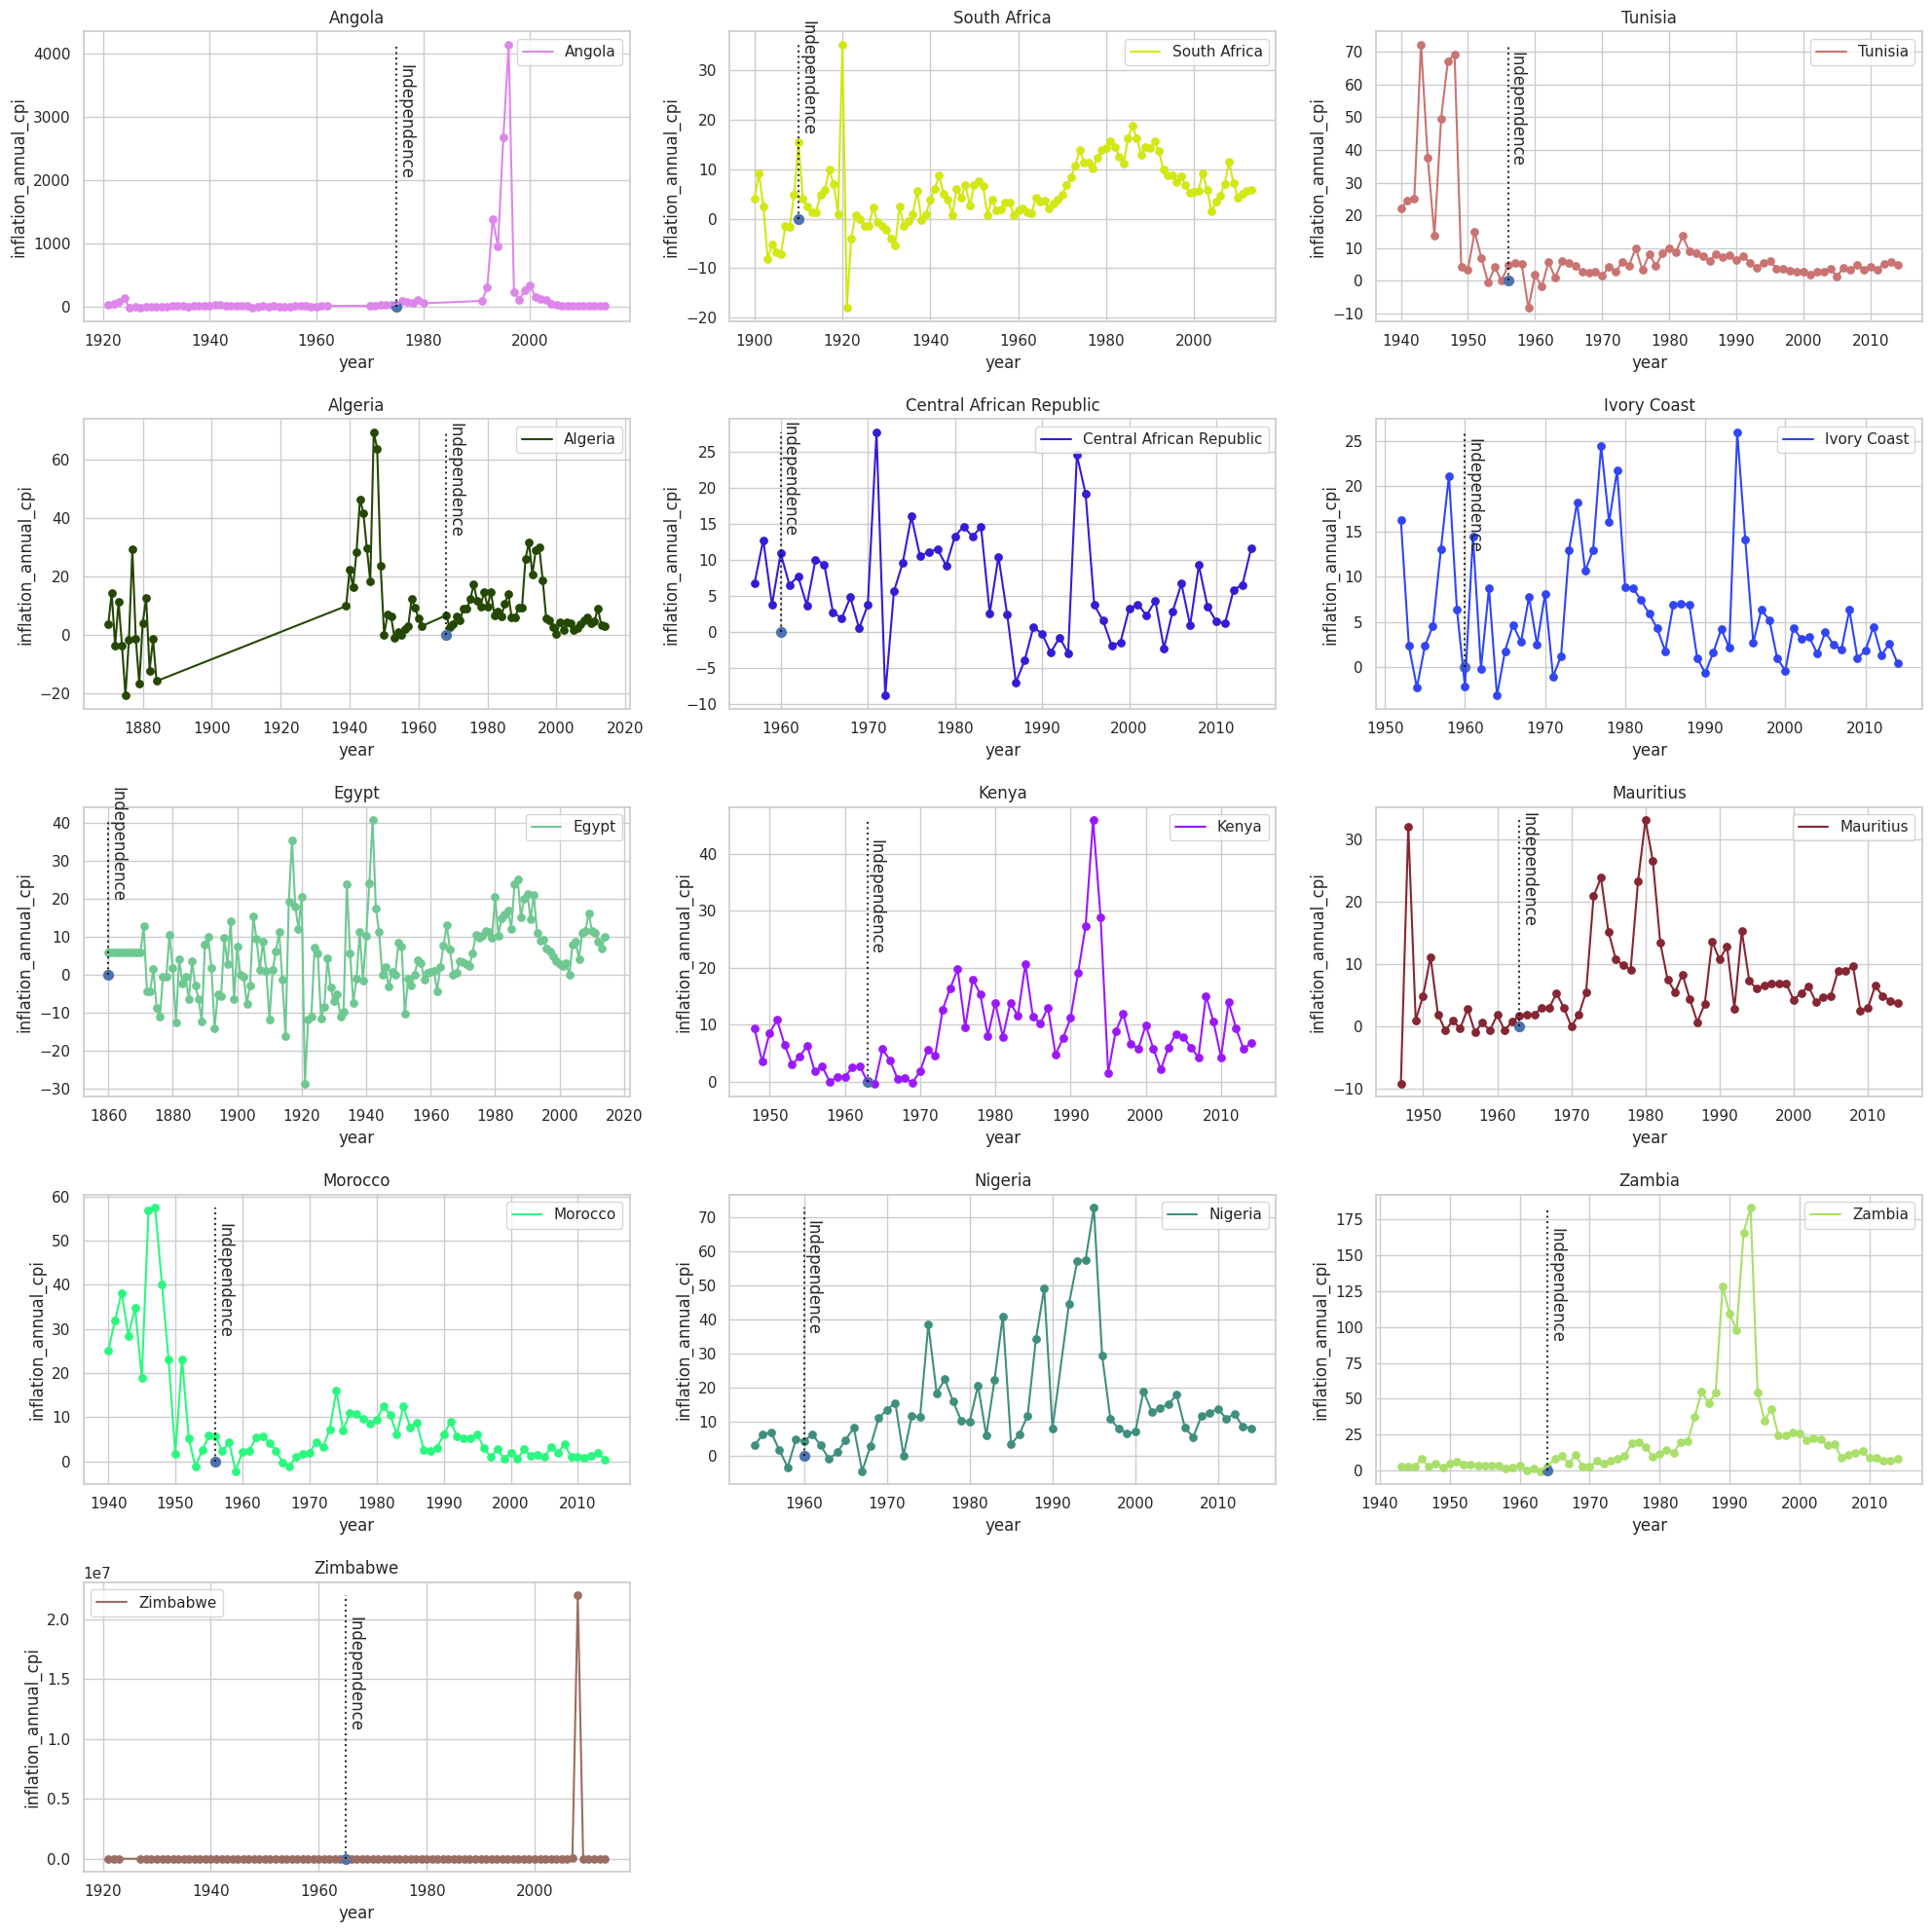

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 20))
count = 1

df = pd.DataFrame(df)
data = df
unique_countries = df.country.unique()

for country in unique_countries:
    plt.subplot(5, 3, count)
    count += 1
    col = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])

    country_data = df[df['country'] == country]

    sns.lineplot(x='year', y='inflation_annual_cpi', data=country_data, label=country, color=col)
    plt.scatter(x='year', y='inflation_annual_cpi', data=country_data, color=col, s=28)

    independence_year = country_data[country_data['independence'] == 1]['year'].min()

    plt.plot([independence_year, independence_year], [0, country_data['inflation_annual_cpi'].max()],
             color='black', linestyle='dotted', alpha=0.8)
    plt.text(independence_year, country_data['inflation_annual_cpi'].max() / 2, 'Independence', rotation=-90)
    plt.scatter(x=independence_year, y=0, s=50)
    plt.title(country)

plt.tight_layout()
plt.savefig('timeseries_inflation rate.png')

plt.show()

Some countries, such as Zimbabwe and Angola, have experienced very high inflation rates, while other countries, such as Morocco and Tunisia, have experienced relatively low inflation rates.


choropleth map of the average inflation rate per country


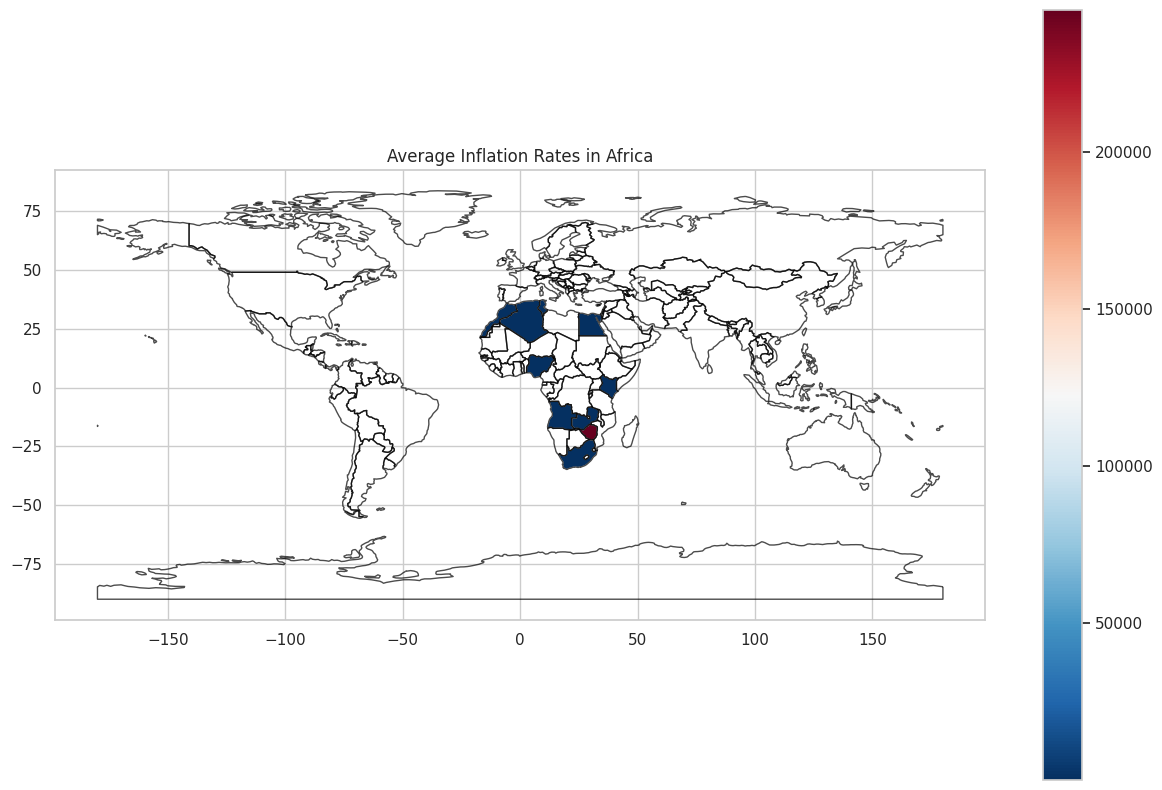

In [ ]:
from matplotlib.colors import Normalize

plt.figure(figsize=(15, 10))
ax = plt.gca()

world.boundary.plot(ax=ax, linewidth=1, color='black', alpha=0.7)

average_inflation_rates = df.groupby('country')['inflation_annual_cpi'].mean().reset_index()

merged_data_inflation_rates = world.merge(average_inflation_rates, how='left', left_on='name', right_on='country')
norm = Normalize(vmin=merged_data_inflation_rates['inflation_annual_cpi'].min(), vmax=merged_data_inflation_rates['inflation_annual_cpi'].max())
merged_data_inflation_rates.plot(column='inflation_annual_cpi', ax=ax, legend=True, cmap='RdBu_r', linewidth=0.8)


plt.title('Average Inflation Rates in Africa')
plt.savefig('map_average_inflation_rates.png')
plt.show()

Some countries, such as Zimbabwe and Angola, have experienced very high average inflation rates. Other countries, such as Morocco and Tunisia, have experienced relatively low average inflation rates.


interactive choropleth map of the average inflation rate per country


In [ ]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_annual_cpi':'cpi inflation rate','cc3':'code','country':'country'},animation_group='country',color='inflation_annual_cpi',color_continuous_scale=px.colors.sequential.Bluered,title='<b>Annual inflation rate of countries in Africa continent',template='plotly')

## Relations

Relation between all 4 factors we're considering for visualisation

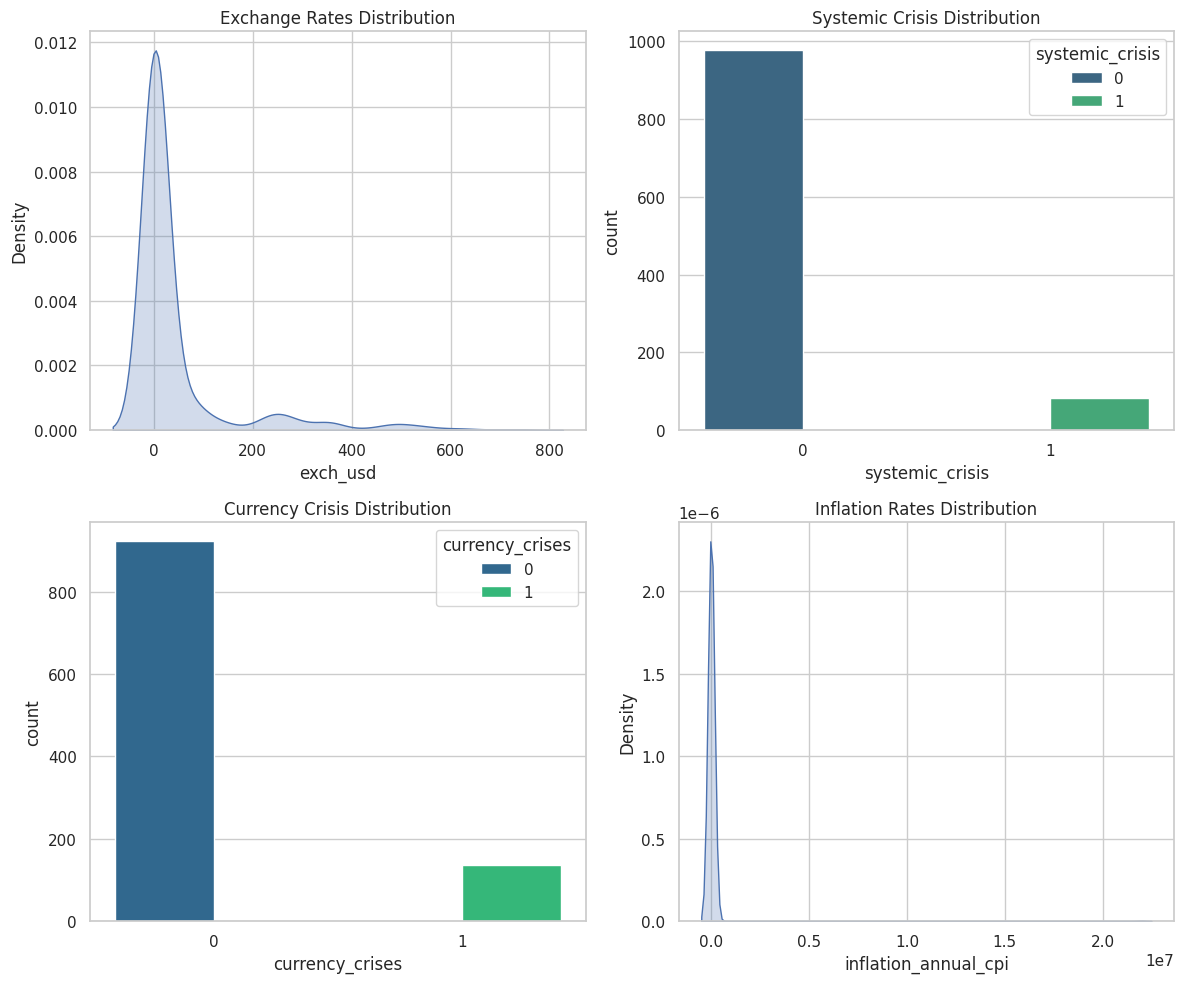

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.kdeplot(x='exch_usd', data=df, fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Exchange Rates Distribution')

sns.countplot(x='systemic_crisis', data=df, hue='systemic_crisis', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Systemic Crisis Distribution')

sns.countplot(x='currency_crises', data=df, hue='currency_crises', ax=axes[1, 0], palette='viridis', saturation=1)  # Set saturation to 1
axes[1, 0].set_title('Currency Crisis Distribution')

sns.kdeplot(x='inflation_annual_cpi', data=df, fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Inflation Rates Distribution')

plt.tight_layout()
plt.show()

### Currency Crisis and Exchange Rates

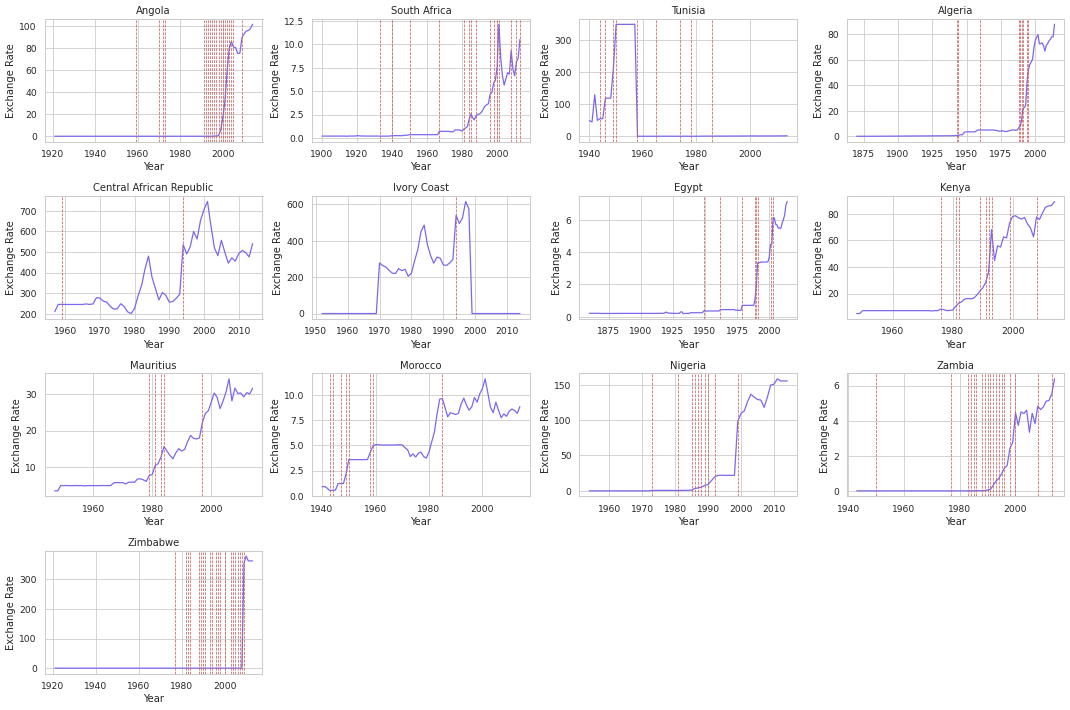

In [ ]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 60)
axes = axes.flatten()
for i, ax in zip(data['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'exch_usd', data = data[data['country'] == i], ax = ax, color = 'mediumslateblue')
  ax.set_xlabel('Year')
  ax.set_ylabel('Exchange Rate')
  ax.set_title('{}'.format(i))
  currency = data[(data['country'] == i) & (data['currency_crises'] == 1)]['year'].unique()
  for i in currency:
    ax.axvline(x=i, color='indianred', linestyle='--', linewidth=.9)
fig.subplots_adjust(top=0.95)
for i in range(13,16):
  fig.delaxes(axes[i])
plt.tight_layout()
plt.savefig('relation_currency exchange.png')

display()

We see that there is a positive correlation between the two variables in many of the countries.

The visualisation also shows that the relationship between the exchange rate and currency crises is not always positive.


### Sysmetic Crisis and Inflation rate

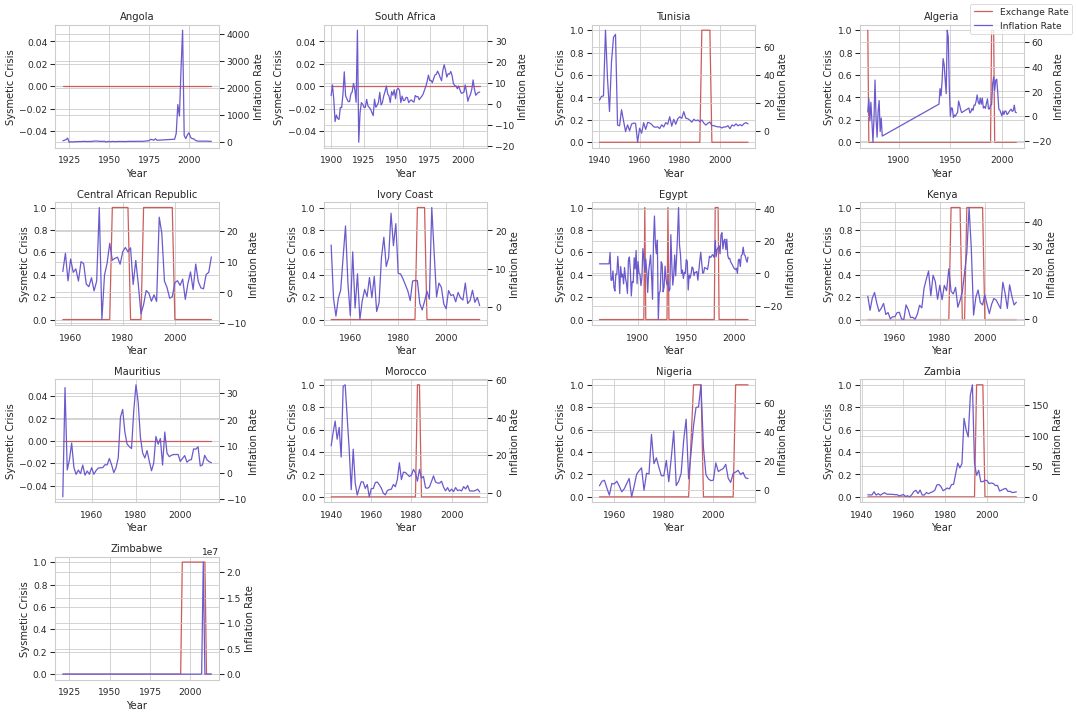

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 60)
axes = axes.flatten()
for i, ax in zip(data['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'systemic_crisis', data = data[data['country'] == i], ax = ax, color = 'indianred', label = 'Exchange Rate')
  ax2 = ax.twinx()
  sns.lineplot(x = 'year', y = 'inflation_annual_cpi', data = data[data['country'] == i], ax = ax2, color = 'slateblue', label = 'Inflation Rate')
  ax.set_xlabel('Year')
  ax.set_ylabel('Sysmetic Crisis')
  ax.get_legend().remove()
  ax2.set_ylabel('Inflation Rate')
  ax2.get_legend().remove()
  ax.set_title('{}'.format(i))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles + handles2, labels + labels2, loc=1)
fig.subplots_adjust(top=0.95)
for i in range(13,16):
  fig.delaxes(axes[i])
plt.tight_layout()
plt.savefig('relation_sysmetic inflation.png')

display()


The visualization shows that there is a positive correlation between the two variables in many of the countries.

We also understand the relationship between the exchange rate and inflation rate is not always positive.


**Summary:**

Over recent decades, sysmetic crises has become more frequent, with Central and West Africa experiencing a higher concentration than North and Southern Africa.

Inflation rates vary a lot in African countries—some have high inflation, while others have low rates. In recent decades, many African nations have seen inflation rates going up.

Exchange rates in African countries differ significantly. Interestingly, a weaker exchange rate is linked to currency crises in many of these nations.

Currency crises are becoming more common in many African countries lately. There's a connection between a country's economic size and complexity and its vulnerability to currency crises.